# Milestone P3

# Milestone Objectives

- Execute the project: single final notebook (main logic), helpers python file (implementations functions).

- Write a data story

- Update README: details the contributions of all group members.

[Milestone P3 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p3-final-project-and-the-datastory)

In [31]:
from helpers import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from implementations import *


In [ ]:
%run ./milestoneP2.ipynb

In [35]:
display(movies2_clean.sample(5))
display(movies2_clean.shape)
display(movies2_clean.info())

,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue,revenue_part
64,28010827,/m/0c3tkft,Open Season 3,2010,75.0,[English Language],[USA],"[Computer Animation, Family Film, Animation]",NaN,NaN,7399925.0,0.000331
3946,13201636,/m/03bypg3,Honky Tonk Freeway,1981,107.0,[English Language],[USA],"[Parody, Ensemble Film, Comedy]",5.2,928.0,1738412.25,0.000762
1821,1367554,/m/04x4st,Mr. Saturday Night,1992,119.0,[English Language],[USA],"[Drama, Comedy-drama, Comedy]",5.9,4500.0,13351357.0,0.001928
4798,236691,/m/01jc6q,Cabaret,1972,119.0,"[French Language, Hebrew Language, English Lan...",[USA],"[LGBT, Musical, Drama, New Hollywood, Film ada...",NaN,NaN,42765000.0,0.05506
521,23092448,/m/09g8vhw,Little Fockers,2010,98.0,[English Language],[USA],"[Screwball comedy, Comedy]",5.5,109092.0,310650585.0,0.013902


(7285, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_wiki       7285 non-null   int64  
 1   id_freebase   7285 non-null   object 
 2   name          7285 non-null   object 
 3   year          7285 non-null   int32  
 4   runtime       7260 non-null   float64
 5   lang          7285 non-null   object 
 6   countries     7285 non-null   object 
 7   genres        7285 non-null   object 
 8   review        2898 non-null   float64
 9   nbr_review    2898 non-null   float64
 10  revenue       7285 non-null   object 
 11  revenue_part  7285 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 654.6+ KB


None

## MEHDI

# Award dataset

In [94]:
DATA_PATH = '../data'
AWARDS_PATH = '/awards/oscars.csv'

In [95]:
awards = pd.read_csv(DATA_PATH+AWARDS_PATH).rename(columns={'year_film': 'year', 'category': 'cat_nominated', 'name': 'name_nominated', 'film': 'name'})
display(awards.sample(5))
display(awards.shape)
display(awards.info())

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
8279,2002,2003,75,DOCUMENTARY (Short Subject),"Robert Hudson, Bobby Houston",Mighty Times: The Legacy of Rosa Parks,False
2234,1948,1949,21,MUSIC (Scoring of a Musical Picture),Victor Young,The Emperor Waltz,False
19,1927,1928,1,OUTSTANDING PICTURE,The Caddo Company,The Racket,False
2067,1946,1947,19,SPECIAL AWARD,Harold Russell for bringing hope and courage ...,NaN,True
9370,2011,2012,84,VISUAL EFFECTS,"Tim Burke, David Vickery, Greg Butler and John...",Harry Potter and the Deathly Hallows Part 2,False


(10765, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            10765 non-null  int64 
 1   year_ceremony   10765 non-null  int64 
 2   ceremony        10765 non-null  int64 
 3   cat_nominated   10765 non-null  object
 4   name_nominated  10761 non-null  object
 5   name            10450 non-null  object
 6   winner          10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.2+ KB


None

In [96]:
# Get rid of missing name rows

awards_clean = awards.copy()
awards_clean = awards.loc[~awards['name'].isna()].reset_index(drop=True)
display(awards_clean.sample(5))
display(awards_clean.shape)
display(awards_clean.info())

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
4707,1971,1972,44,ACTOR,Peter Finch,Sunday Bloody Sunday,False
8159,2003,2004,76,MUSIC (Original Song),Music and Lyric by Michael McKean and Annette ...,A Mighty Wind,False
2262,1949,1950,22,SHORT SUBJECT (Cartoon),"Fred Quimby, Producer",Hatch Up Your Troubles,False
8078,2002,2003,75,WRITING (Adapted Screenplay),Screenplay by Peter Hedges and Chris Weitz & P...,About a Boy,False
7402,1996,1997,69,SHORT FILM (Live Action),"David Frankel, Barry Jossen",Dear Diary,True


(10450, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10450 entries, 0 to 10449
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            10450 non-null  int64 
 1   year_ceremony   10450 non-null  int64 
 2   ceremony        10450 non-null  int64 
 3   cat_nominated   10450 non-null  object
 4   name_nominated  10450 non-null  object
 5   name            10450 non-null  object
 6   winner          10450 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 500.2+ KB


None

In [97]:
generate_missing_info(awards_clean)

,Missing Data (%)
Column,
year,0.0
year_ceremony,0.0
ceremony,0.0
cat_nominated,0.0
name_nominated,0.0
name,0.0
winner,0.0


In [98]:
awards_clean.cat_nominated.unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)', 'DIRECTING',
       'WRITING', 'OUTSTANDING PRODUCTION', 'SOUND RECORDING',
       'SHORT SUBJECT (Cartoon)', 'SHORT SUBJECT (Comedy)',
       'SHORT SUBJECT (Novelty)', 'ASSISTANT DIRECTOR', 'FILM EDITING',
       'MUSIC (Scoring)', 'MUSIC (Song)', 'DANCE DIRECTION',
       'WRITING (Screenplay)', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A SUPPORTING ROLE', 'SHORT SUBJECT (Color)',
       'SHORT SUBJECT (One-reel)', 'SHORT SUBJECT (Two-reel)',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECTION (Color)',
       'WRITING (Original Screenplay)', 'DOCUME

In [99]:
check_doublons(awards_clean, ['name'], 'year', 'ceremony')

Rows with real duplicates: 
                                    name  year  ceremony
1                       The Last Command  1927         1
3                             7th Heaven  1927         1
5                                Sunrise  1927         1
7                             7th Heaven  1927         1
9                                Sunrise  1927         1
...                                  ...   ...       ...
10444          The Banshees of Inisherin  2022        95
10445  Everything Everywhere All at Once  2022        95
10446                      The Fabelmans  2022        95
10447                                Tár  2022        95
10448                Triangle of Sadness  2022        95

[7020 rows x 3 columns]
--------------------------------------------------------------------------------


In [100]:
awards_clean[awards_clean['name']=='7th Heaven']

,year,year_ceremony,ceremony,cat_nominated,name_nominated,name,winner
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
13,1927,1928,1,DIRECTING (Dramatic Picture),Frank Borzage,7th Heaven,True
18,1927,1928,1,OUTSTANDING PICTURE,Fox,7th Heaven,False
25,1927,1928,1,WRITING (Adaptation),Benjamin Glazer,7th Heaven,True


In [101]:
awards_condensed = awards_clean.copy()
aggregation_functions = {
    'year': 'first',
    'year_ceremony': 'first',
    'ceremony': 'first',
    'cat_nominated': list,
    'name_nominated': list,
    'winner': list
}

awards_condensed = awards_clean.groupby('name').agg(aggregation_functions).reset_index()

display(awards_condensed.sample(5))
display(awards_condensed.shape)
display(awards_condensed.info())

,name,year,year_ceremony,ceremony,cat_nominated,name_nominated,winner
2389,My Cousin Vinny,1992,1993,65,[ACTRESS IN A SUPPORTING ROLE],[Marisa Tomei],[True]
824,Cinderella Horse,1948,1949,21,[SHORT SUBJECT (One-reel)],"[Gordon Hollingshead, Producer]",[False]
897,Couples and Robbers,1981,1982,54,[SHORT FILM (Live Action)],"[Christine Oestreicher, Producer]",[False]
1439,Gone with the Wind,1939,1940,12,"[ACTOR, ACTRESS, ACTRESS IN A SUPPORTING ROLE,...","[Clark Gable, Vivien Leigh, Olivia de Havillan...","[False, True, False, True, True, True, True, T..."
3135,Sophie's Choice,1982,1983,55,"[ACTRESS IN A LEADING ROLE, CINEMATOGRAPHY, CO...","[Meryl Streep, Nestor Almendros, Albert Wolsky...","[True, False, False, False, False]"


(4991, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            4991 non-null   object
 1   year            4991 non-null   int64 
 2   year_ceremony   4991 non-null   int64 
 3   ceremony        4991 non-null   int64 
 4   cat_nominated   4991 non-null   object
 5   name_nominated  4991 non-null   object
 6   winner          4991 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.1+ KB


None

In [102]:
awards_condensed[awards_condensed['name']=='7th Heaven']

,name,year,year_ceremony,ceremony,cat_nominated,name_nominated,winner
39,7th Heaven,1927,1928,1,"[ACTRESS, ART DIRECTION, DIRECTING (Dramatic P...","[Janet Gaynor, Harry Oliver, Frank Borzage, Fo...","[True, False, True, False, True]"


(array([274., 696., 569., 472., 478., 430., 501., 480., 543., 548.]),
 array([1927. , 1936.5, 1946. , 1955.5, 1965. , 1974.5, 1984. , 1993.5,
        2003. , 2012.5, 2022. ]),
 [<matplotlib.patches.Polygon at 0x22bdf6ebb50>])

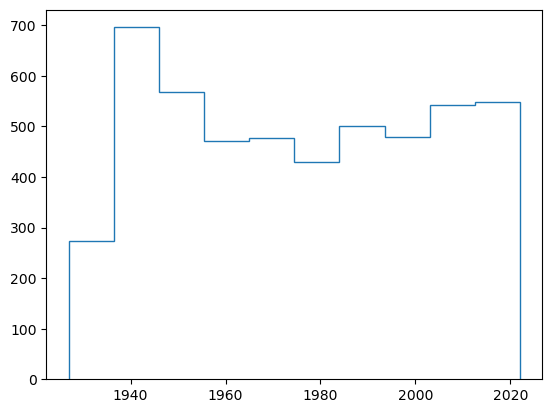

In [103]:
plt.hist(awards_condensed.year, histtype='step') 

In [104]:
movies3 = movies2_clean.copy()
movies3 = pd.merge(movies2_clean, awards_condensed, on=['name', 'year'], how='left')

display(movies3.sample(5))
display(movies3.shape)
display(movies3.info())

,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue,revenue_part,year_ceremony,ceremony,cat_nominated,name_nominated,winner
3112,3823100,/m/0b1twg,Wuthering Heights,1939,104.0,[English Language],[USA],"[Costume drama, Black-and-white, Period piece,...",NaN,NaN,624643.0,0.001424,1940.0,12.0,"[ACTOR, ACTRESS IN A SUPPORTING ROLE, ART DIRE...","[Laurence Olivier, Geraldine Fitzgerald, James...","[False, False, False, True, False, False, Fals..."
5012,12289886,/m/02vz2wj,The Mountain,1956,105.0,[English Language],[USA],"[Action/Adventure, Adventure, Sports, Drama, F...",NaN,NaN,1800000.0,0.004511,NaN,NaN,NaN,NaN,NaN
6239,2002104,/m/06d5sb,Halloween II,1981,90.0,[English Language],[USA],"[Cult, Horror, Slasher, Teen]",NaN,NaN,25533818.0,0.011189,NaN,NaN,NaN,NaN,NaN
6725,16595579,/m/03ydl0l,Were the World Mine,2008,95.0,[English Language],[USA],"[LGBT, Adventure, Feature film, Gay, Musical c...",NaN,NaN,123789.0,0.000006,NaN,NaN,NaN,NaN,NaN
5877,1681255,/m/05mygl,Zebrahead,1992,102.0,[English Language],[USA],"[Coming of age, Indie, Drama, Romantic drama, ...",NaN,NaN,1468300.0,0.000212,NaN,NaN,NaN,NaN,NaN


(7285, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_wiki         7285 non-null   int64  
 1   id_freebase     7285 non-null   object 
 2   name            7285 non-null   object 
 3   year            7285 non-null   int32  
 4   runtime         7260 non-null   float64
 5   lang            7285 non-null   object 
 6   countries       7285 non-null   object 
 7   genres          7285 non-null   object 
 8   review          2898 non-null   float64
 9   nbr_review      2898 non-null   float64
 10  revenue         7285 non-null   object 
 11  revenue_part    7285 non-null   object 
 12  year_ceremony   1277 non-null   float64
 13  ceremony        1277 non-null   float64
 14  cat_nominated   1277 non-null   object 
 15  name_nominated  1277 non-null   object 
 16  winner          1277 non-null   object 
dtypes: float64(5), int32(1), int64(1)

None

In [105]:
movies3['oscar_nomination'] = pd.notna(movies3['ceremony'])

In [106]:
movies3.insert(movies3.columns.get_loc('revenue_part') + 1, 'oscar_nomination', movies3.pop('oscar_nomination'))
movies3 = movies3.drop(columns=['year_ceremony', 'ceremony'])

display(movies3.sample(5))
display(movies3.shape) 
display(movies3.info())

,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue,revenue_part,oscar_nomination,cat_nominated,name_nominated,winner
6374,143834,/m/012626,The Boys from Brazil,1978,100.0,[English Language],"[USA, United Kingdom]","[Thriller, Science Fiction, Film adaptation, D...",NaN,NaN,19000000.0,0.008537,True,"[ACTOR IN A LEADING ROLE, FILM EDITING, MUSIC ...","[Laurence Olivier, Robert E. Swink, Jerry Gold...","[False, False, False]"
979,156745,/m/014l6_,Pretty Woman,1990,125.0,"[Japanese Language, Italian Language, English ...",[USA],"[Romantic comedy, Romance Film, Comedy]",NaN,NaN,463407268.0,0.066495,True,[ACTRESS IN A LEADING ROLE],[Julia Roberts],[False]
6811,1179229,/m/04dx1c,Sudden Impact,1983,117.0,[English Language],[USA],"[Thriller, Crime Fiction, Action Thrillers, Ac...",6.599502,42210.0,67642693.0,0.023669,False,NaN,NaN,NaN
7165,9083841,/m/027x1hd,The House Across the Bay,1940,88.0,[English Language],[USA],"[Crime Fiction, Drama]",NaN,NaN,684374.0,0.00322,False,NaN,NaN,NaN
1204,4139688,/m/0bl61r,Terminal Velocity,1994,102.0,[English Language],"[USA, Canada]","[Thriller, Action/Adventure, Action Thrillers,...",5.496866,13082.0,16481012.25,0.001976,False,NaN,NaN,NaN


(7285, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_wiki           7285 non-null   int64  
 1   id_freebase       7285 non-null   object 
 2   name              7285 non-null   object 
 3   year              7285 non-null   int32  
 4   runtime           7260 non-null   float64
 5   lang              7285 non-null   object 
 6   countries         7285 non-null   object 
 7   genres            7285 non-null   object 
 8   review            2898 non-null   float64
 9   nbr_review        2898 non-null   float64
 10  revenue           7285 non-null   object 
 11  revenue_part      7285 non-null   object 
 12  oscar_nomination  7285 non-null   bool   
 13  cat_nominated     1277 non-null   object 
 14  name_nominated    1277 non-null   object 
 15  winner            1277 non-null   object 
dtypes: bool(1), float64(3), int32(1), int64(1)

None

# Trying to get more ratings 

In [108]:
BIG_RATINGS_PATH = '/ml-latest/ratings.csv'

In [109]:
big_ratings = pd.read_csv(DATA_PATH+BIG_RATINGS_PATH)
display(big_ratings.sample(5))
display(big_ratings.shape)
display(big_ratings.info())  # NEED TO INTEGRATE 

,userId,movieId,rating,timestamp
21425910,209046,6333,3.0,1196247749
7871571,77136,60684,2.5,1438820369
29305457,286292,48516,4.5,1437316487
7220402,70497,68358,4.0,1287475998
11516358,113238,45499,1.5,1213203547


(33832162, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


None